In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math as mth
import operator as oprt
from pandas.api.types import is_numeric_dtype
from sklearn.ensemble import IsolationForest

In [261]:
data = pd.read_csv('train.csv', header=0)

In [262]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [263]:
data.shape

(1460, 81)

In [264]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [265]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [266]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [268]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [269]:
data.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Target value: SalePrice

In [270]:
data['SalePrice'].dtype

dtype('int64')

In [271]:
round(data['SalePrice'].describe(), 1)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

Right skewed distribution

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

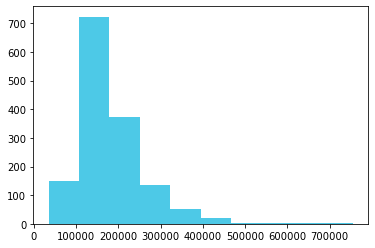

In [272]:
plt.hist(data['SalePrice'], color='#4DC9E7')

Target value: Overall Quality

In [273]:
data['OverallQual'].dtype

dtype('int64')

In [274]:
print('OverallQual:',sorted(data.OverallQual.unique()))

OverallQual: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Missing values

In [275]:
data.columns[data.isnull().any() == True]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [276]:
sum_missed = data.isnull().sum()
sum_missed[sum_missed > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [277]:
share = sum_missed[sum_missed > 0]/data.count()['Id']*100
share.sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [278]:
print('PoolQC:',data.PoolQC.unique())
print('MiscFeature:',data.MiscFeature.unique())
print('Alley:',data.Alley.unique())
print('Fence:',data.Fence.unique())
print('FireplaceQu:',data.FireplaceQu.unique())
print('LotFrontage:',data.MiscFeature.unique())
print('GarageType:',data.GarageType.unique())
print('GarageYrBlt:',sorted(data.GarageYrBlt.unique()))
print('GarageFinish:',data.GarageFinish.unique())
print('GarageQual:',data.GarageQual.unique())
print('GarageCond:',data.GarageCond.unique())
print('BsmtQual:',data.BsmtQual.unique())
print('BsmtCond:',data.BsmtCond.unique())
print('BsmtExposure:',data.BsmtExposure.unique())
print('BsmtFinType1:',data.BsmtFinType1.unique())
print('BsmtFinType2:',data.BsmtFinType2.unique())
print('MasVnrArea:',sorted(data.MasVnrArea.unique()))
print('MasVnrType:',data.MasVnrType.unique())
print('Electrical:',data.Electrical.unique())
#All these attributes have NA in the description. 
#So NaN in the data means not missing value but the absence of something in the house.
#We will fill these 'missing' values with "None"

PoolQC: [nan 'Ex' 'Fa' 'Gd']
MiscFeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley: [nan 'Grvl' 'Pave']
Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageYrBlt: [1915.0, 1920.0, 1930.0, 1931.0, 1935.0, 1939.0, 1945.0, 1948.0, 1953.0, 1954.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1970.0, 1973.0, 1974.0, 1976.0, 1977.0, 1981.0, 1983.0, 1985.0, 1987.0, 1989.0, 1990.0, 1991.0, 1993.0, 1995.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, nan, 1900.0, 1906.0, 1908.0, 1910.0, 1914.0, 1916.0, 1918.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1932.0, 1933.0, 1934.0, 1936.0, 1937.0, 1938.0, 1940.0, 1941.0, 1942.0, 1946.0, 1947.0, 1949.0, 1950.0, 1951.0, 1952.0, 1955.0, 1961.0, 1969.0, 1971.0, 1972.

In [279]:
data.corr(method = 'pearson')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<AxesSubplot:>

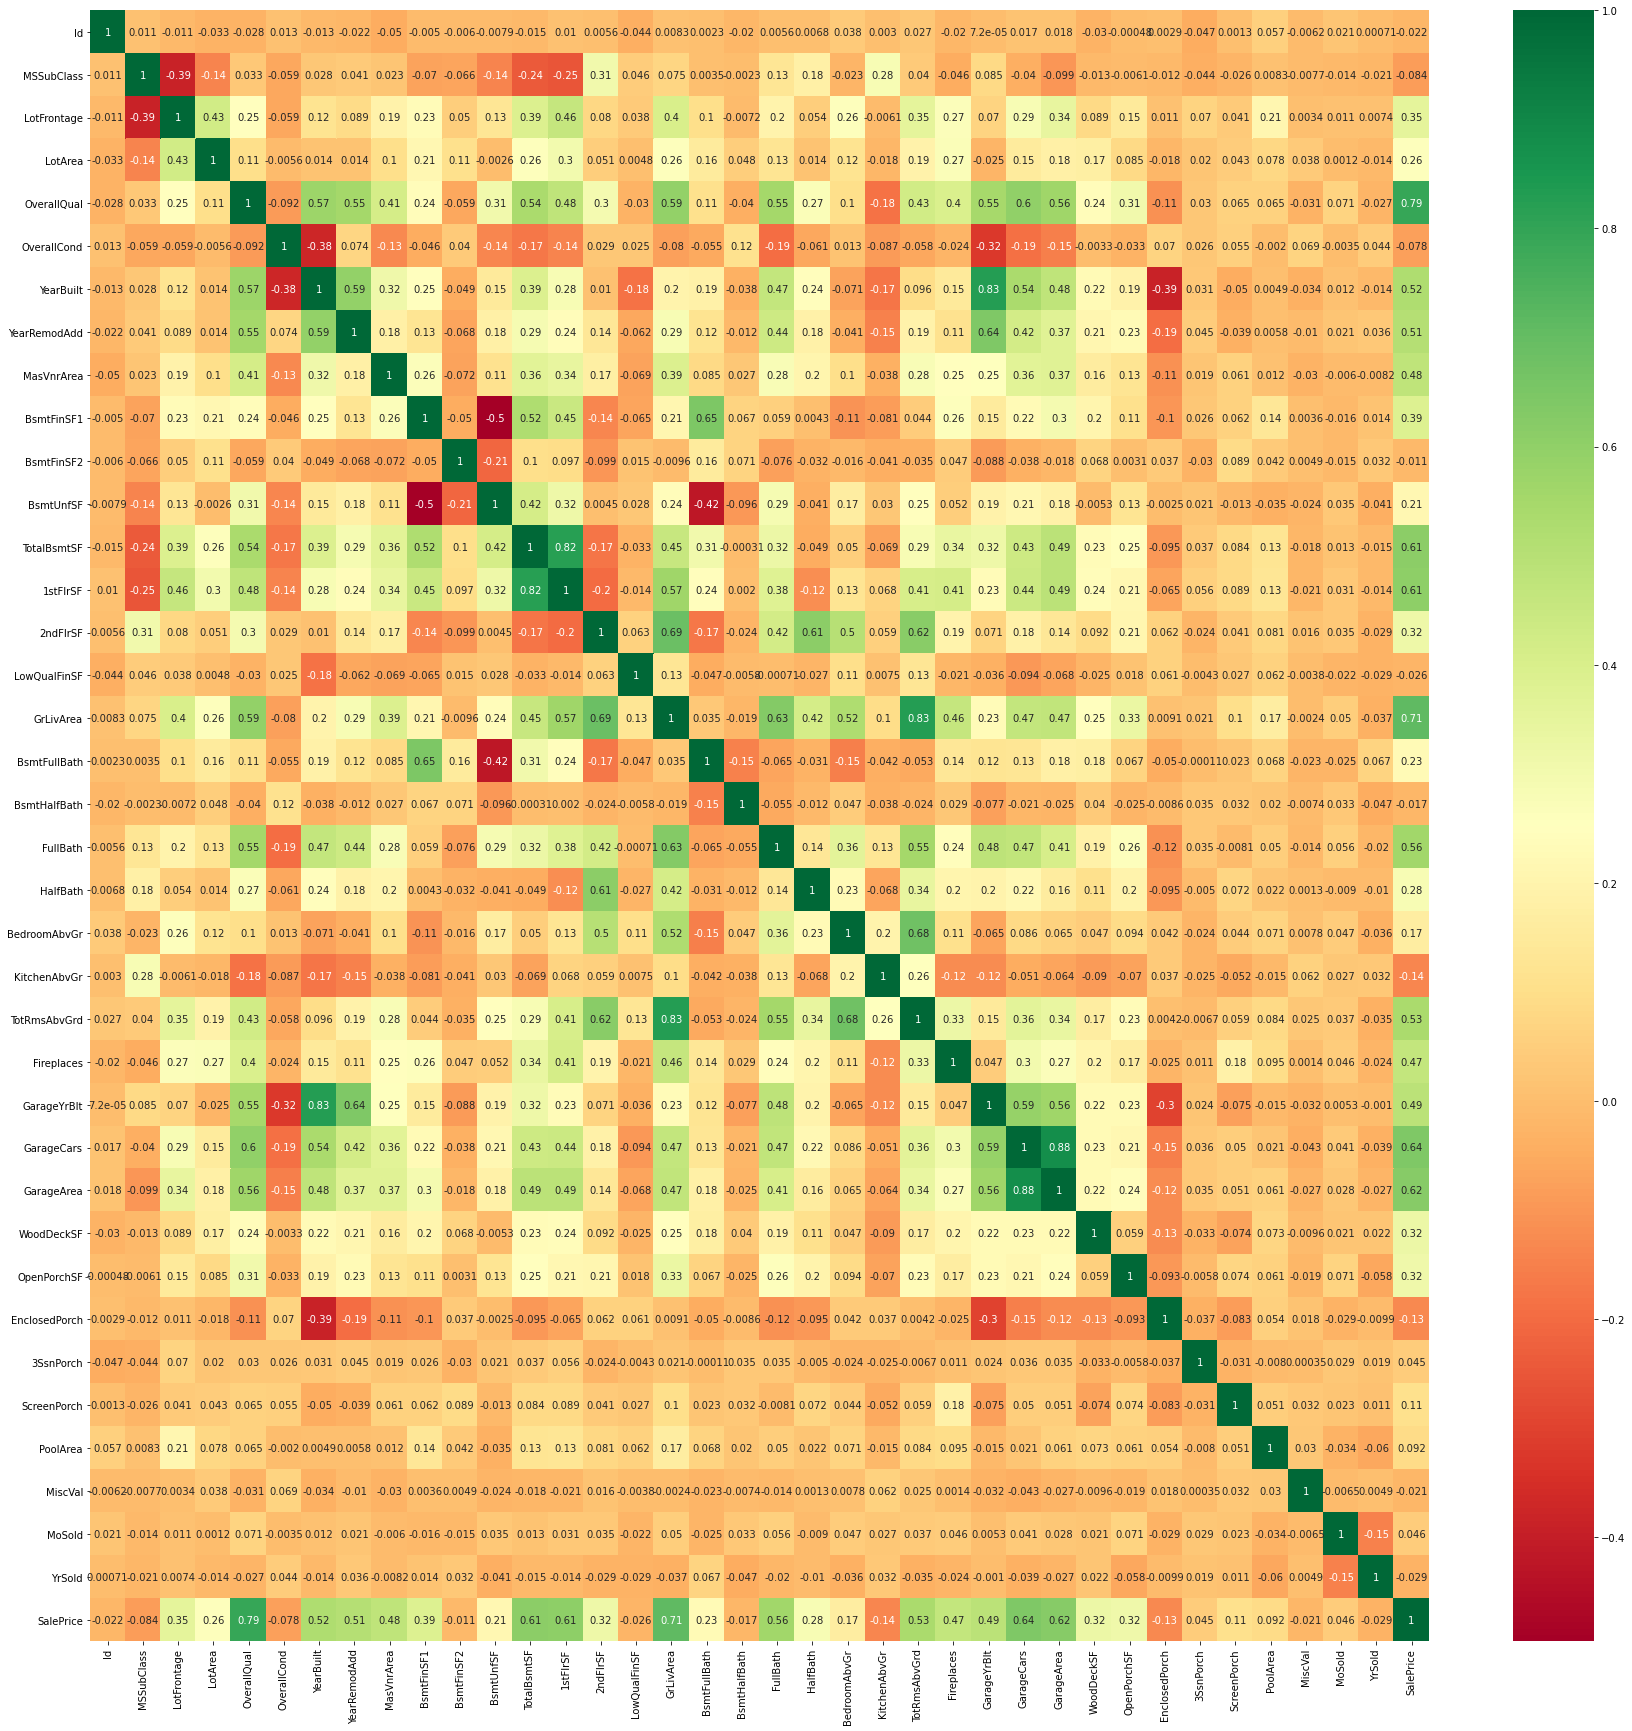

In [280]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(method = 'pearson'), annot = True, cmap='RdYlGn')

In [281]:
data.corr(method = 'pearson')['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

Text(0, 0.5, 'SalePrice')

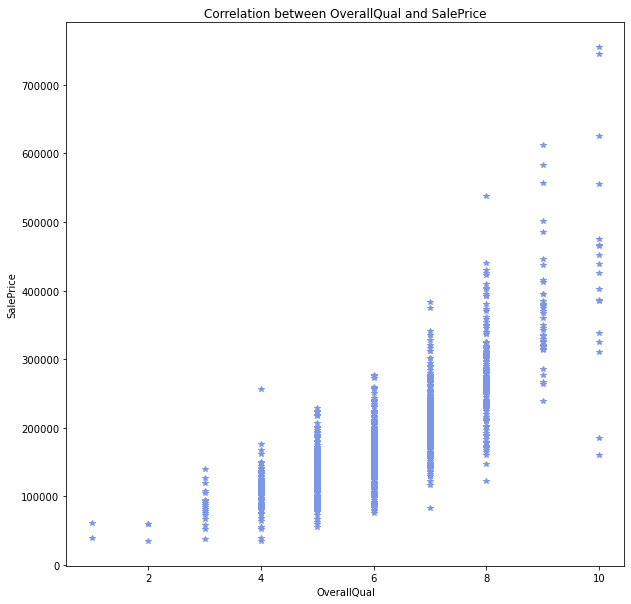

In [282]:
plt.figure(figsize=(10, 10))
plt.plot(data['OverallQual'], data['SalePrice'], '*', color = '#7D96E5')
plt.title('Correlation between OverallQual and SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

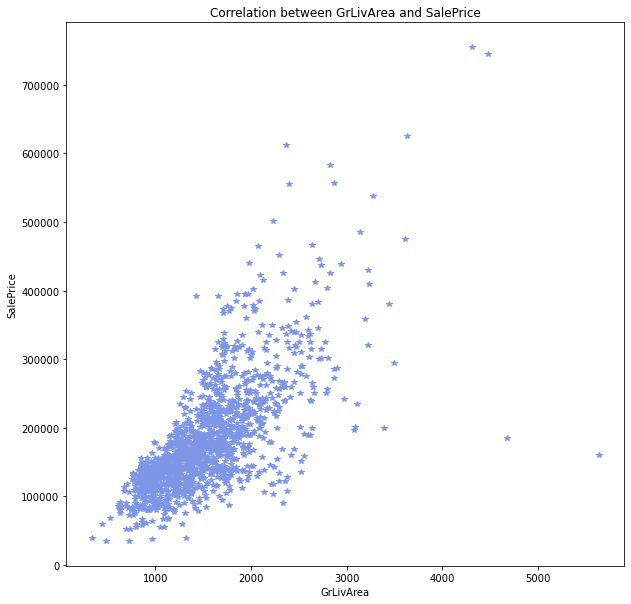

In [283]:
plt.figure(figsize=(10, 10))
plt.plot(data['GrLivArea'], data['SalePrice'], '*', color = '#7D96E5')
plt.title('Correlation between GrLivArea and SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Missing values treatment

In [284]:
data['MasVnrArea'].fillna(0, inplace = True)
data['LotFrontage'].fillna('None', inplace = True)
data['GarageType'].fillna('None', inplace = True)
data['GarageFinish'].fillna('None', inplace = True)
data['GarageQual'].fillna('None', inplace = True)
data['GarageCond'].fillna('None', inplace = True)
data['MasVnrType'].fillna('None', inplace = True)
data['BsmtQual'].fillna('None', inplace = True)
data['BsmtCond'].fillna('None', inplace = True)
data['BsmtExposure'].fillna('None', inplace = True)
data['BsmtFinType1'].fillna('None', inplace = True)
data['BsmtFinType2'].fillna('None', inplace = True)
data['Electrical'].fillna('None', inplace = True)
data['Alley'].fillna('None', inplace = True)
data['Fence'].fillna('None', inplace = True)
data['MiscFeature'].fillna('None', inplace = True)
data['PoolQC'].fillna('None', inplace = True)
data['FireplaceQu'].fillna('None', inplace = True)

Attribute reduction

In [285]:
data.corr(method = 'pearson')['1stFlrSF']['TotalBsmtSF'] #Total square is more informative

0.8195299750050339

Text(0, 0.5, 'TotalBsmtSF')

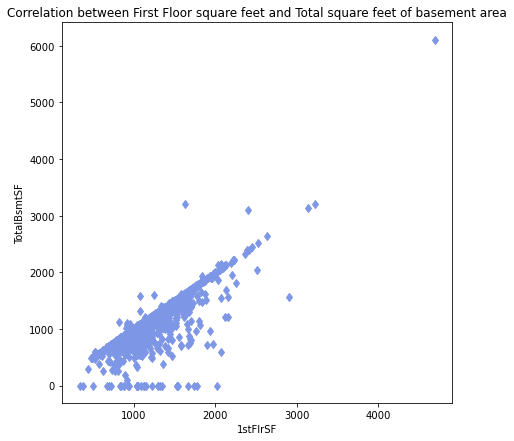

In [286]:
plt.figure(figsize=(7, 7))
plt.plot(data['1stFlrSF'], data['TotalBsmtSF'], 'd', color = '#7D96E5')
plt.title('Correlation between First Floor square feet and Total square feet of basement area')
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')

In [287]:
data.corr(method = 'pearson')['GarageArea']['GarageCars']

0.882475414281462

Text(0, 0.5, 'GarageCars')

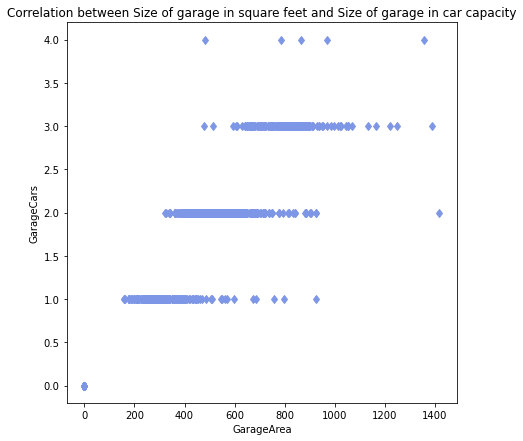

In [288]:
plt.figure(figsize=(7, 7))
plt.plot(data['GarageArea'], data['GarageCars'], 'd', color = '#7D96E5')
plt.title('Correlation between Size of garage in square feet and Size of garage in car capacity')
plt.xlabel('GarageArea')
plt.ylabel('GarageCars')

<AxesSubplot:xlabel='GarageCars'>

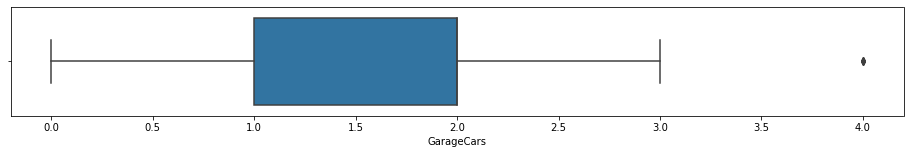

In [289]:
plt.figure(figsize=(16,2))
sns.boxplot(x=data.GarageCars)

<AxesSubplot:xlabel='GarageArea'>

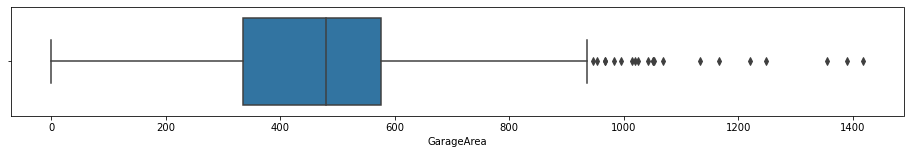

In [290]:
plt.figure(figsize=(16,2))
sns.boxplot(x=data.GarageArea)

In [291]:
data.corr(method = 'pearson')['GarageYrBlt']['YearBuilt'] #YearBuilt is more informative

0.8256674841743408

Text(0, 0.5, 'YearBuilt')

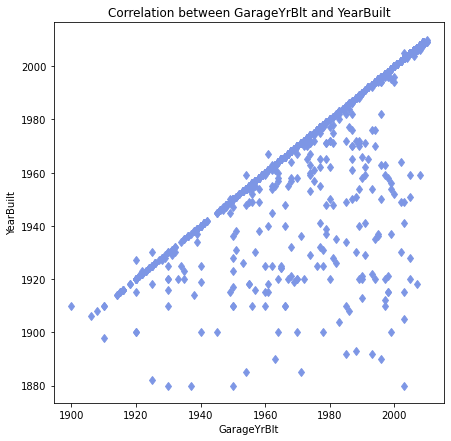

In [292]:
plt.figure(figsize=(7, 7))
plt.plot(data['GarageYrBlt'], data['YearBuilt'], 'd', color = '#7D96E5')
plt.title('Correlation between GarageYrBlt and YearBuilt')
plt.xlabel('GarageYrBlt')
plt.ylabel('YearBuilt')

In [293]:
data.corr(method = 'pearson')['TotRmsAbvGrd']['GrLivArea'] #GrLivArea has the highest corr with SalePrice

0.8254893743088425

Text(0, 0.5, 'GrLivArea')

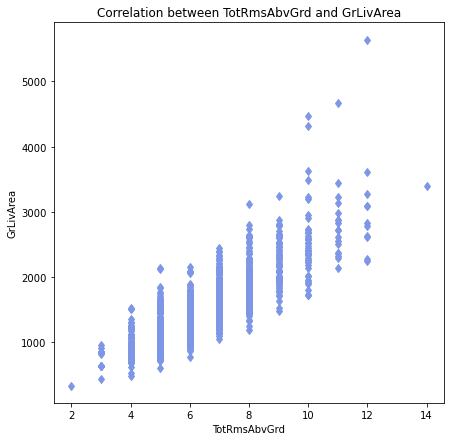

In [294]:
plt.figure(figsize=(7, 7))
plt.plot(data['TotRmsAbvGrd'], data['GrLivArea'], 'd', color = '#7D96E5')
plt.title('Correlation between TotRmsAbvGrd and GrLivArea')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')

In [295]:
data.drop('GarageYrBlt', axis = 1, inplace = True)
data.drop('1stFlrSF', axis = 1, inplace = True)
data.drop('TotRmsAbvGrd', axis = 1, inplace = True)
data.drop('GarageArea', axis = 1, inplace = True)

In [296]:
data.describe(include=object)

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,111,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,6,4,7,6,7,4,6,6,3,4,5,5,9,6
top,RL,None,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,1151,259,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,690,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [297]:
obj = data.describe(include=object)
obj.loc[:, (obj.loc[['freq']] >= 1460*0.8).any()]

,Street,Alley,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,RoofMatl,ExterCond,BsmtCond,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,2,3,4,2,3,9,8,5,8,5,5,7,6,2,6,7,6,6,3,4,5,5,9,6
top,Pave,None,Lvl,AllPub,Gtl,Norm,Norm,1Fam,CompShg,TA,TA,Unf,GasA,Y,SBrkr,Typ,TA,TA,Y,None,None,None,WD,Normal
freq,1454,1369,1311,1459,1382,1260,1445,1220,1434,1282,1311,1256,1428,1365,1334,1360,1311,1326,1340,1453,1179,1406,1267,1198


In [298]:
data.drop('Street', axis = 1, inplace = True)
data.drop('Alley', axis = 1, inplace = True)
data.drop('LandContour', axis = 1, inplace = True)
data.drop('Utilities', axis = 1, inplace = True)
data.drop('LandSlope', axis = 1, inplace = True)
data.drop('Condition1', axis = 1, inplace = True)
data.drop('Condition2', axis = 1, inplace = True)
data.drop('BldgType', axis = 1, inplace = True)
data.drop('RoofMatl', axis = 1, inplace = True)
data.drop('ExterCond', axis = 1, inplace = True)
data.drop('BsmtCond', axis = 1, inplace = True)
data.drop('BsmtFinType2', axis = 1, inplace = True)
data.drop('Heating', axis = 1, inplace = True)
data.drop('CentralAir', axis = 1, inplace = True)
data.drop('Electrical', axis = 1, inplace = True)
data.drop('Functional', axis = 1, inplace = True)
data.drop('GarageQual', axis = 1, inplace = True)
data.drop('GarageCond', axis = 1, inplace = True)
data.drop('PavedDrive', axis = 1, inplace = True)
data.drop('PoolQC', axis = 1, inplace = True)
data.drop('Fence', axis = 1, inplace = True)
data.drop('MiscFeature', axis = 1, inplace = True)
data.drop('SaleType', axis = 1, inplace = True)
data.drop('SaleCondition', axis = 1, inplace = True)

In [299]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,854,0,1710,1,0,2,1,3,1,Gd,0,None,Attchd,RFn,2,0,61,0,0,0,0,0,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,2,298,0,0,0,0,0,0,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,2,0,42,0,0,0,0,0,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,3,0,35,272,0,0,0,0,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,3,192,84,0,0,0,0,0,12,2008,250000


In [300]:
data.shape

(1460, 53)

In [301]:
dfs = []

for col in data.columns:
    top_values = []
    if is_numeric_dtype(data[col]):
        top_values = data[col].mode()
        dfs.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
stat = pd.concat(dfs, axis=1)
list_col = []
list_val = []
for i, j in stat.loc[0].items():
    list_col.append(i)
    list_val.append(j)
def freq (i, j):
    freq = (data[i] == j).sum() / 1460 * 100
    return freq
freq (list_col, list_val)

Id                0.068493
MSSubClass       36.712329
LotArea           1.712329
OverallQual      27.191781
OverallCond      56.232877
YearBuilt         4.589041
YearRemodAdd     12.191781
MasVnrArea       59.520548
BsmtFinSF1       31.986301
BsmtFinSF2       88.561644
BsmtUnfSF         8.082192
TotalBsmtSF       2.534247
2ndFlrSF         56.780822
LowQualFinSF     98.219178
GrLivArea         1.506849
BsmtFullBath     58.630137
BsmtHalfBath     94.383562
FullBath         52.602740
HalfBath         62.534247
BedroomAbvGr     55.068493
KitchenAbvGr     95.342466
Fireplaces       47.260274
GarageCars       56.438356
WoodDeckSF       52.123288
OpenPorchSF      44.931507
EnclosedPorch    85.753425
3SsnPorch        98.356164
ScreenPorch      92.054795
PoolArea         99.520548
MiscVal          96.438356
MoSold           17.328767
YrSold           23.150685
SalePrice         1.369863
dtype: float64

In [302]:
data.drop('BsmtFinSF2', axis = 1, inplace = True)
data.drop('LowQualFinSF', axis = 1, inplace = True)
data.drop('BsmtHalfBath', axis = 1, inplace = True)
data.drop('KitchenAbvGr', axis = 1, inplace = True)
data.drop('EnclosedPorch', axis = 1, inplace = True)
data.drop('3SsnPorch', axis = 1, inplace = True)
data.drop('ScreenPorch', axis = 1, inplace = True)
data.drop('PoolArea', axis = 1, inplace = True)
data.drop('MiscVal', axis = 1, inplace = True)

In [303]:
data.shape

(1460, 44)

Outlier Detection

In [304]:
Id_str = data['Id'].astype(str)
data['Id_str'] = Id_str
numeric_data = data.select_dtypes(include=np.number)

In [305]:
numeric_data.columns[numeric_data.isnull().any() == True]

Index([], dtype='object')

In [306]:
X_train, y_train = numeric_data.iloc[:, :-1], numeric_data.iloc[:, -1]

### Isolation Forest
The scikit-learn library provides a number of built-in automatic methods for identifying outliers in data. Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.

The scikit-learn library provides an implementation of Isolation Forest in the IsolationForest class.

Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

In [307]:
forest = IsolationForest(contamination=0.01)
isofor = forest.fit_predict(X_train)
out = isofor != -1
X_train, y_train = X_train.iloc[out, :], y_train.iloc[out]
print(X_train.shape, y_train.shape)

(1445, 23) (1445,)


In [308]:
obj_data = data.select_dtypes(include=['object'])

In [309]:
obj_data.rename({'Id_str': 'Id'}, axis=1, inplace=True)

C:\Users\Dns\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [310]:
obj_data['Id'] = obj_data['Id'].astype(np.int64)

<ipython-input-310-4da9153818c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_data['Id'] = obj_data['Id'].astype(np.int64)


In [311]:
X = pd.merge(X_train,obj_data,on='Id')

In [312]:
X.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [313]:
f = [X, y_train]
result = pd.concat(f, axis=1, join="inner")

In [314]:
full_data = result
full_data.shape

(1445, 44)

In [315]:
full_data.columns[full_data.isnull().any() == True]

Index([], dtype='object')

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

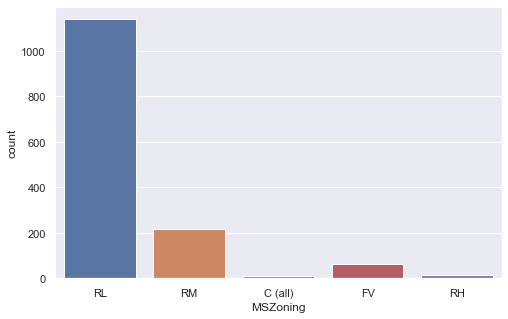

In [316]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='MSZoning', data=full_data)

In [317]:
full_data['MSZoning'].value_counts()

RL         1139
RM          215
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [318]:
full_data.drop(full_data[(full_data['MSZoning'] == 'C (all)')].index, inplace=True)

<AxesSubplot:xlabel='LotShape', ylabel='count'>

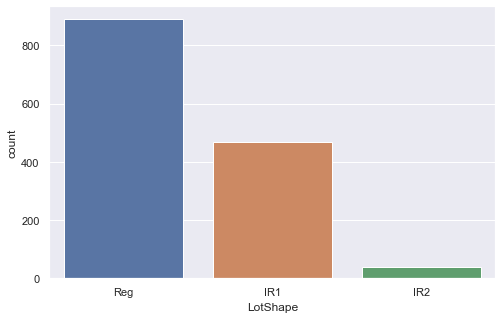

In [327]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='LotShape', data=full_data)

In [319]:
full_data['LotShape'].value_counts()

Reg    912
IR1    475
IR2     39
IR3      9
Name: LotShape, dtype: int64

In [320]:
full_data.drop(full_data[(full_data['LotShape'] == 'IR3')].index, inplace=True)

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

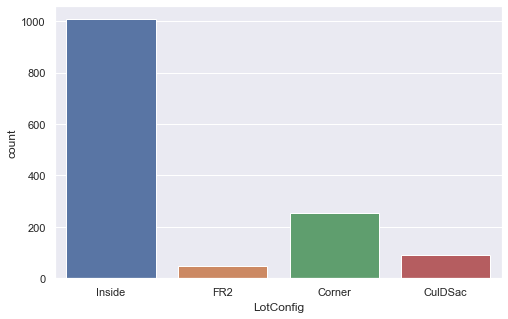

In [328]:
sns.countplot(x='LotConfig', data=full_data)

In [321]:
full_data['LotConfig'].value_counts()

Inside     1027
Corner      257
CulDSac      91
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [322]:
full_data.drop(full_data[(full_data['LotConfig'] == 'FR3')].index, inplace=True)

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

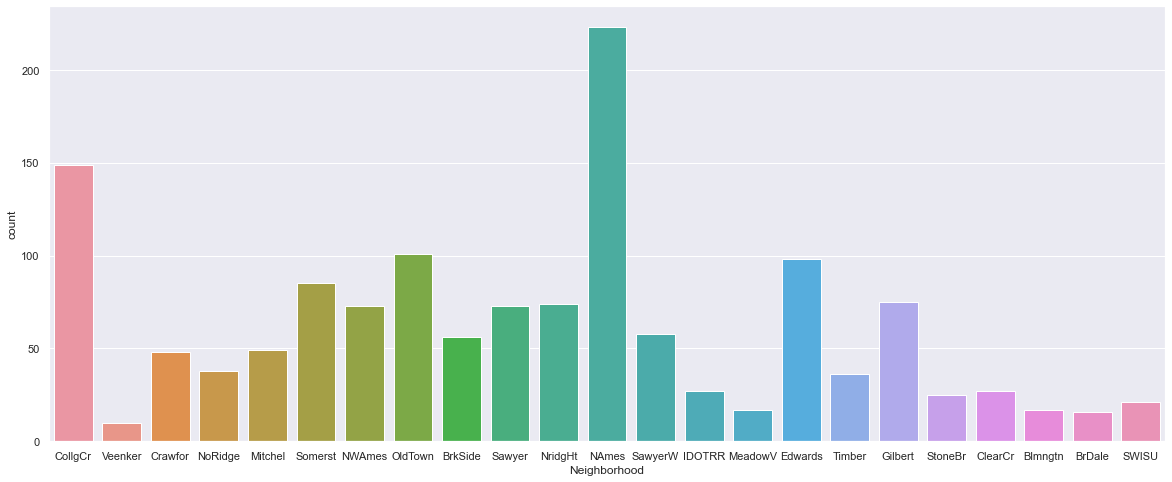

In [329]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x='Neighborhood', data=full_data)

In [323]:
full_data['Neighborhood'].value_counts()

NAmes      223
CollgCr    149
OldTown    108
Edwards     98
Somerst     85
Gilbert     75
NridgHt     74
NWAmes      73
Sawyer      73
SawyerW     58
BrkSide     57
Crawfor     50
Mitchel     49
NoRidge     38
Timber      36
IDOTRR      28
ClearCr     27
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [324]:
full_data.drop(full_data[(full_data['Neighborhood'] == 'Blueste')].index, inplace=True)
full_data.drop(full_data[(full_data['Neighborhood'] == 'NPkVill')].index, inplace=True)

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

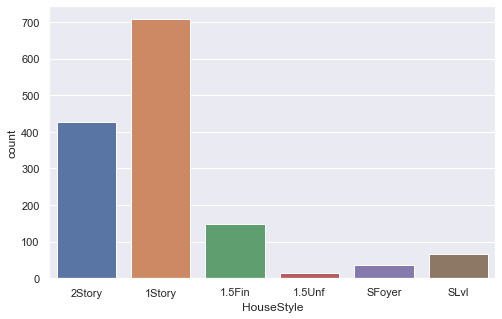

In [330]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='HouseStyle', data=full_data)

In [325]:
full_data['HouseStyle'].value_counts()

1Story    707
2Story    427
1.5Fin    147
SLvl       65
SFoyer     36
1.5Unf     14
2.5Unf      9
2.5Fin      6
Name: HouseStyle, dtype: int64

In [326]:
full_data.drop(full_data[(full_data['HouseStyle'] == '2.5Fin')].index, inplace=True)
full_data.drop(full_data[(full_data['HouseStyle'] == '2.5Unf')].index, inplace=True)

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

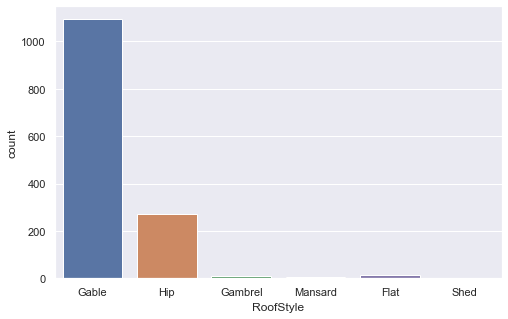

In [331]:
sns.countplot(x='RoofStyle', data=full_data)

In [332]:
full_data['RoofStyle'].value_counts()

Gable      1093
Hip         271
Flat         13
Gambrel      10
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [333]:
full_data.drop(full_data[(full_data['RoofStyle'] == 'Mansard')].index, inplace=True)
full_data.drop(full_data[(full_data['RoofStyle'] == 'Shed')].index, inplace=True)

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

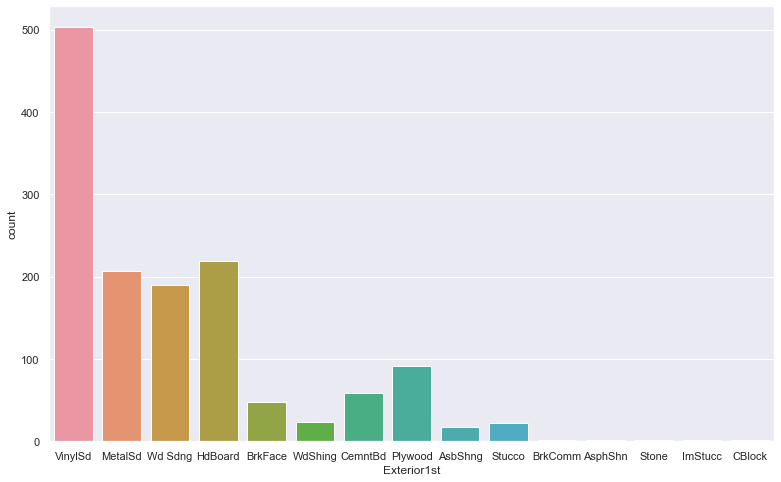

In [334]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(x='Exterior1st', data=full_data)

In [335]:
full_data['Exterior1st'].value_counts()

VinylSd    503
HdBoard    219
MetalSd    207
Wd Sdng    190
Plywood     92
CemntBd     59
BrkFace     48
WdShing     23
Stucco      22
AsbShng     17
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [336]:
full_data.drop(full_data[(full_data['Exterior1st'] == 'BrkComm')].index, inplace=True)
full_data.drop(full_data[(full_data['Exterior1st'] == 'Stone')].index, inplace=True)
full_data.drop(full_data[(full_data['Exterior1st'] == 'CBlock')].index, inplace=True)
full_data.drop(full_data[(full_data['Exterior1st'] == 'AsphShn')].index, inplace=True)
full_data.drop(full_data[(full_data['Exterior1st'] == 'ImStucc')].index, inplace=True)

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

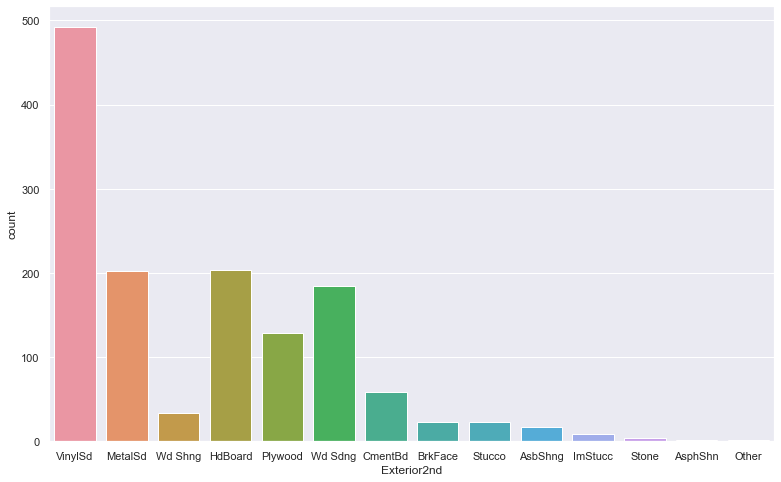

In [337]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(x='Exterior2nd', data=full_data)

In [338]:
full_data['Exterior2nd'].value_counts()

VinylSd    492
HdBoard    203
MetalSd    202
Wd Sdng    184
Plywood    129
CmentBd     58
Wd Shng     34
BrkFace     23
Stucco      23
AsbShng     17
ImStucc      9
Stone        4
Other        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [339]:
full_data.drop(full_data[(full_data['Exterior2nd'] == 'Stone')].index, inplace=True)
full_data.drop(full_data[(full_data['Exterior2nd'] == 'AsphShn')].index, inplace=True)
full_data.drop(full_data[(full_data['Exterior2nd'] == 'CBlock')].index, inplace=True)
full_data.drop(full_data[(full_data['Exterior2nd'] == 'Other')].index, inplace=True)
full_data.drop(full_data[(full_data['Exterior2nd'] == 'ImStucc')].index, inplace=True)

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

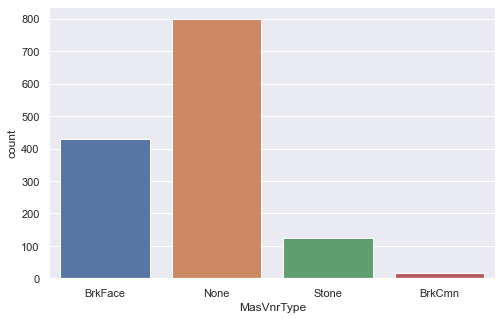

In [340]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='MasVnrType', data=full_data)

In [341]:
full_data['MasVnrType'].value_counts()

None       798
BrkFace    429
Stone      123
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

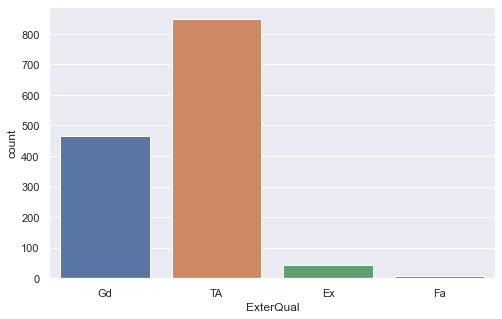

In [342]:
sns.countplot(x='ExterQual', data=full_data)

In [343]:
full_data['ExterQual'].value_counts()

TA    847
Gd    465
Ex     45
Fa      8
Name: ExterQual, dtype: int64

In [344]:
full_data.drop(full_data[(full_data['ExterQual'] == 'Fa')].index, inplace=True)

<AxesSubplot:xlabel='Foundation', ylabel='count'>

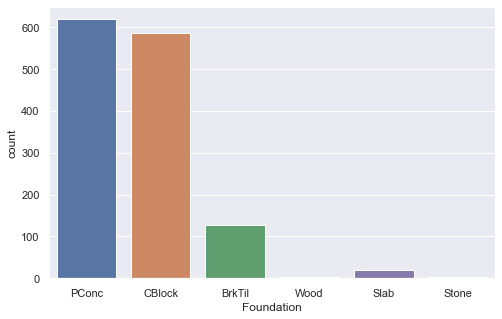

In [345]:
sns.countplot(x='Foundation', data=full_data)

In [346]:
full_data['Foundation'].value_counts()

PConc     618
CBlock    585
BrkTil    127
Slab       20
Stone       4
Wood        3
Name: Foundation, dtype: int64

In [347]:
full_data.drop(full_data[(full_data['Foundation'] == 'Stone')].index, inplace=True)
full_data.drop(full_data[(full_data['Foundation'] == 'Wood')].index, inplace=True)

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

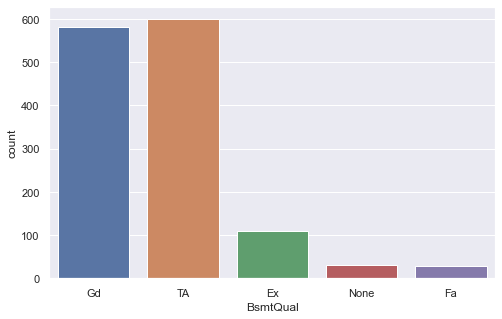

In [348]:
sns.countplot(x='BsmtQual', data=full_data)

In [349]:
full_data['BsmtQual'].value_counts()

TA      599
Gd      582
Ex      109
None     31
Fa       29
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

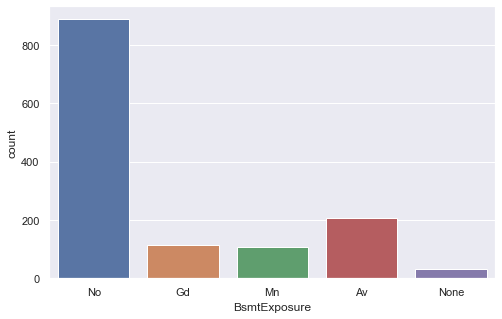

In [350]:
sns.countplot(x='BsmtExposure', data=full_data)

In [351]:
full_data['BsmtExposure'].value_counts()

No      888
Av      207
Gd      115
Mn      108
None     32
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

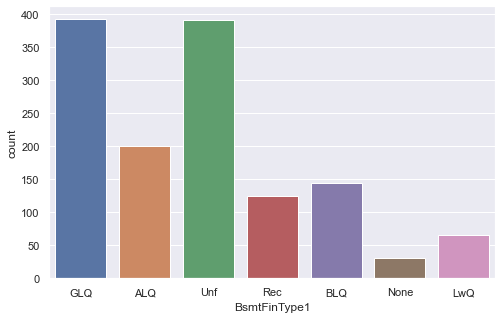

In [352]:
sns.countplot(x='BsmtFinType1', data=full_data)

In [353]:
full_data['BsmtFinType1'].value_counts()

GLQ     392
Unf     391
ALQ     201
BLQ     145
Rec     124
LwQ      66
None     31
Name: BsmtFinType1, dtype: int64

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

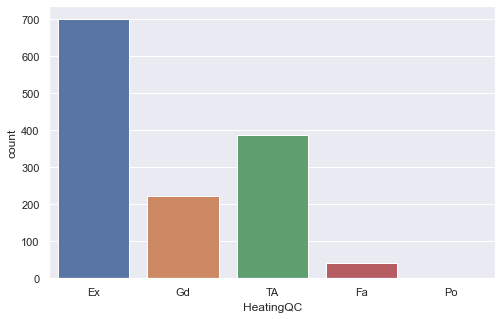

In [354]:
sns.countplot(x='HeatingQC', data=full_data)

In [355]:
full_data['HeatingQC'].value_counts()

Ex    699
TA    388
Gd    222
Fa     40
Po      1
Name: HeatingQC, dtype: int64

In [356]:
full_data.drop(full_data[(full_data['HeatingQC'] == 'Po')].index, inplace=True)

In [357]:
full_data['HeatingQC'].value_counts()

Ex    699
TA    388
Gd    222
Fa     40
Name: HeatingQC, dtype: int64

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

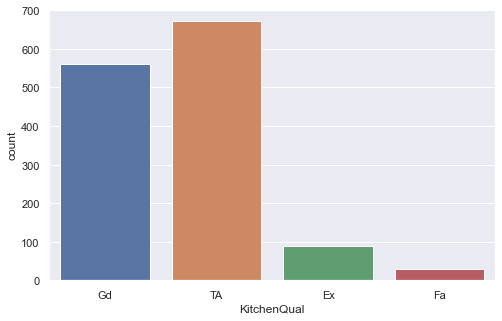

In [358]:
sns.countplot(x='KitchenQual', data=full_data)

In [359]:
full_data['KitchenQual'].value_counts()

TA    671
Gd    560
Ex     90
Fa     28
Name: KitchenQual, dtype: int64

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

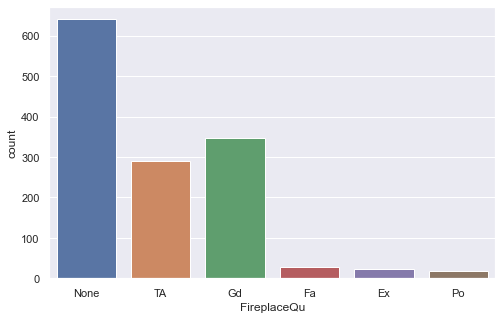

In [360]:
sns.countplot(x='FireplaceQu', data=full_data)

In [361]:
full_data['FireplaceQu'].value_counts()

None    640
Gd      348
TA      291
Fa       29
Ex       22
Po       19
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

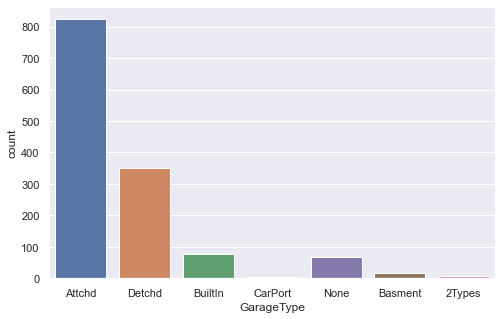

In [362]:
sns.countplot(x='GarageType', data=full_data)

In [363]:
full_data['GarageType'].value_counts()

Attchd     823
Detchd     352
BuiltIn     78
None        69
Basment     16
2Types       6
CarPort      5
Name: GarageType, dtype: int64

In [364]:
full_data.drop(full_data[(full_data['GarageType'] == 'CarPort')].index, inplace=True)
full_data.drop(full_data[(full_data['GarageType'] == '2Types')].index, inplace=True)

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

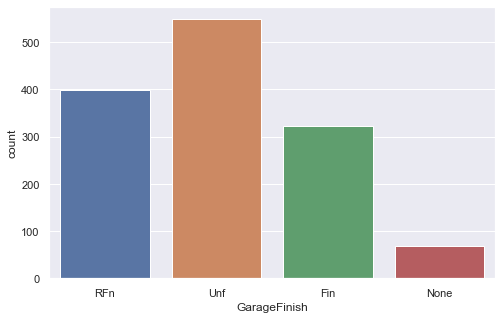

In [365]:
sns.countplot(x='GarageFinish', data=full_data)

In [366]:
full_data['GarageFinish'].value_counts()

Unf     548
RFn     398
Fin     323
None     69
Name: GarageFinish, dtype: int64

In [367]:
full_data.shape

(1338, 44)

In [368]:
full_data.columns[full_data.isnull().any() == True]

Index([], dtype='object')

In [369]:
full_data.to_csv('full_data.csv', index=False)